In [1]:
# pandas, Numpy
import pandas as pd
import numpy as np

# Import visualization packages "Matplotlib" and "Seaborn". 
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import itertools

from ipywidgets import interact, widgets

import scipy

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import tree

from sklearn.metrics import classification_report, accuracy_score,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score

In [2]:
#Read dataset and make a copy of the original
df_white=pd.read_csv("Resources/winequality-red.csv",delimiter=';') 

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Data types and other information
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
def quality(rating):
    if rating >= 7:
        return 'promising'
    elif rating <=5:
        return 'cooking wine'
    else:
        return 'trivial wine'

In [5]:
df_white['rating'] = (df_white['quality']).apply(quality)

In [6]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,cooking wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,cooking wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,trivial wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,cooking wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,trivial wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,trivial wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,cooking wine


In [7]:
# checking missing values
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64

In [8]:
# checking duplicates
df_white.duplicated().sum()

240

In [9]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,cooking wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,cooking wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,trivial wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,cooking wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,trivial wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,trivial wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,cooking wine


In [10]:
# Looking at the duplicates
df_duplicates=df_white.copy()
df_duplicates['duplicates']=df_white.duplicated()

In [11]:
#creating dataset of duplicates
df_duplicates=df_duplicates.loc[df_duplicates['duplicates']==True]
df_duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,duplicates
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine,True
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,cooking wine,True
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,cooking wine,True
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,cooking wine,True
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5,cooking wine,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,cooking wine,True
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,cooking wine,True
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,cooking wine,True
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,cooking wine,True


In [12]:
df_duplicates['fixed acidity'].value_counts()

fixed acidity
7.2     18
7.1     11
7.5     10
7.7      9
8.3      9
        ..
9.8      1
10.3     1
15.0     1
5.2      1
6.3      1
Name: count, Length: 64, dtype: int64

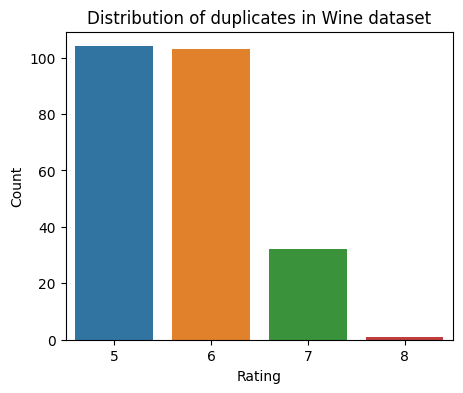

In [13]:
#plotting the duplicates
plt.figure(figsize=(5, 4))
sns.countplot(x='quality', data=df_duplicates)
plt.title('Distribution of duplicates in Wine dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [14]:
# Keep only the first occurrence of each duplicate
# df_white.drop_duplicates(keep='first', inplace=True)

In [15]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


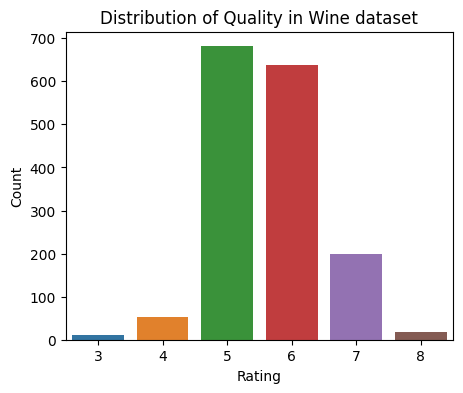

In [16]:
#Distribution of the target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='quality', data=df_white)
plt.title('Distribution of Quality in Wine dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

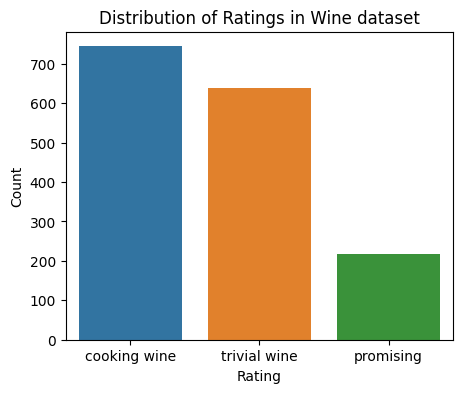

In [17]:
#Distribution of the target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='rating', data=df_white)
plt.title('Distribution of Ratings in Wine dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [18]:
# Get the counts and percentages
value_counts = df_white['rating'].value_counts()
percentage_counts = df_white['rating'].value_counts(normalize=True) * 100  

# Create a DataFrame to combine counts and percentages
summary_df = pd.DataFrame({
    'Count': value_counts,
    'Percentage': percentage_counts
})

# Format the Percentage to 1 decimal place
summary_df['Percentage'] = summary_df['Percentage'].round(1)

# Display the summary DataFrame
print(summary_df)


              Count  Percentage
rating                         
cooking wine    744        46.5
trivial wine    638        39.9
promising       217        13.6


### Numerical variables

In [19]:
palette = sns.color_palette('Blues', 8)
wine=df_white.copy()
wine.drop(['rating'], axis=1, inplace=True)#it is not a numerical.
numerical = wine.select_dtypes(include = 'number').columns


numerical

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
def plot_distribution(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle("Distribution of Continuous Variables", fontsize=16, fontweight='bold')

    # Histogram
    counts, bins, patches = ax1.hist(df_white[column].dropna(), bins=20, edgecolor='black')
    ax1.set_xlabel(column, fontsize=14)
    ax1.set_ylabel("Counts", fontsize=14)

    # Adding data labels to histogram bars
    for count, patch in zip(counts, patches):
        height = patch.get_height()
        ax1.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    # Boxplot
    ax2.boxplot(df_white[column].dropna(), vert=False)
    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel("", fontsize=14)

    # Adding median and quartile values to the box plot
    median = np.median(df_white[column].dropna())
    q1 = np.percentile(df_white[column].dropna(), 25)
    q3 = np.percentile(df_white[column].dropna(), 75)

    ax2.annotate(f'Median: {median:.2f}', xy=(median, 1), xytext=(0, -28), 
                 textcoords='offset points', ha='center', va='center', color='red', fontsize=12)
    ax2.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='blue', fontsize=12)
    ax2.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='green', fontsize=12)

    #plt.savefig(f'img/{column}.png')
    plt.tight_layout()
    plt.show()

# Create an interactive widget
interact(plot_distribution, column=widgets.Dropdown(options=numerical, description='Numeric:'))

interactive(children=(Dropdown(description='Numeric:', options=('fixed acidity', 'volatile acidity', 'citric a…

<function __main__.plot_distribution(column)>

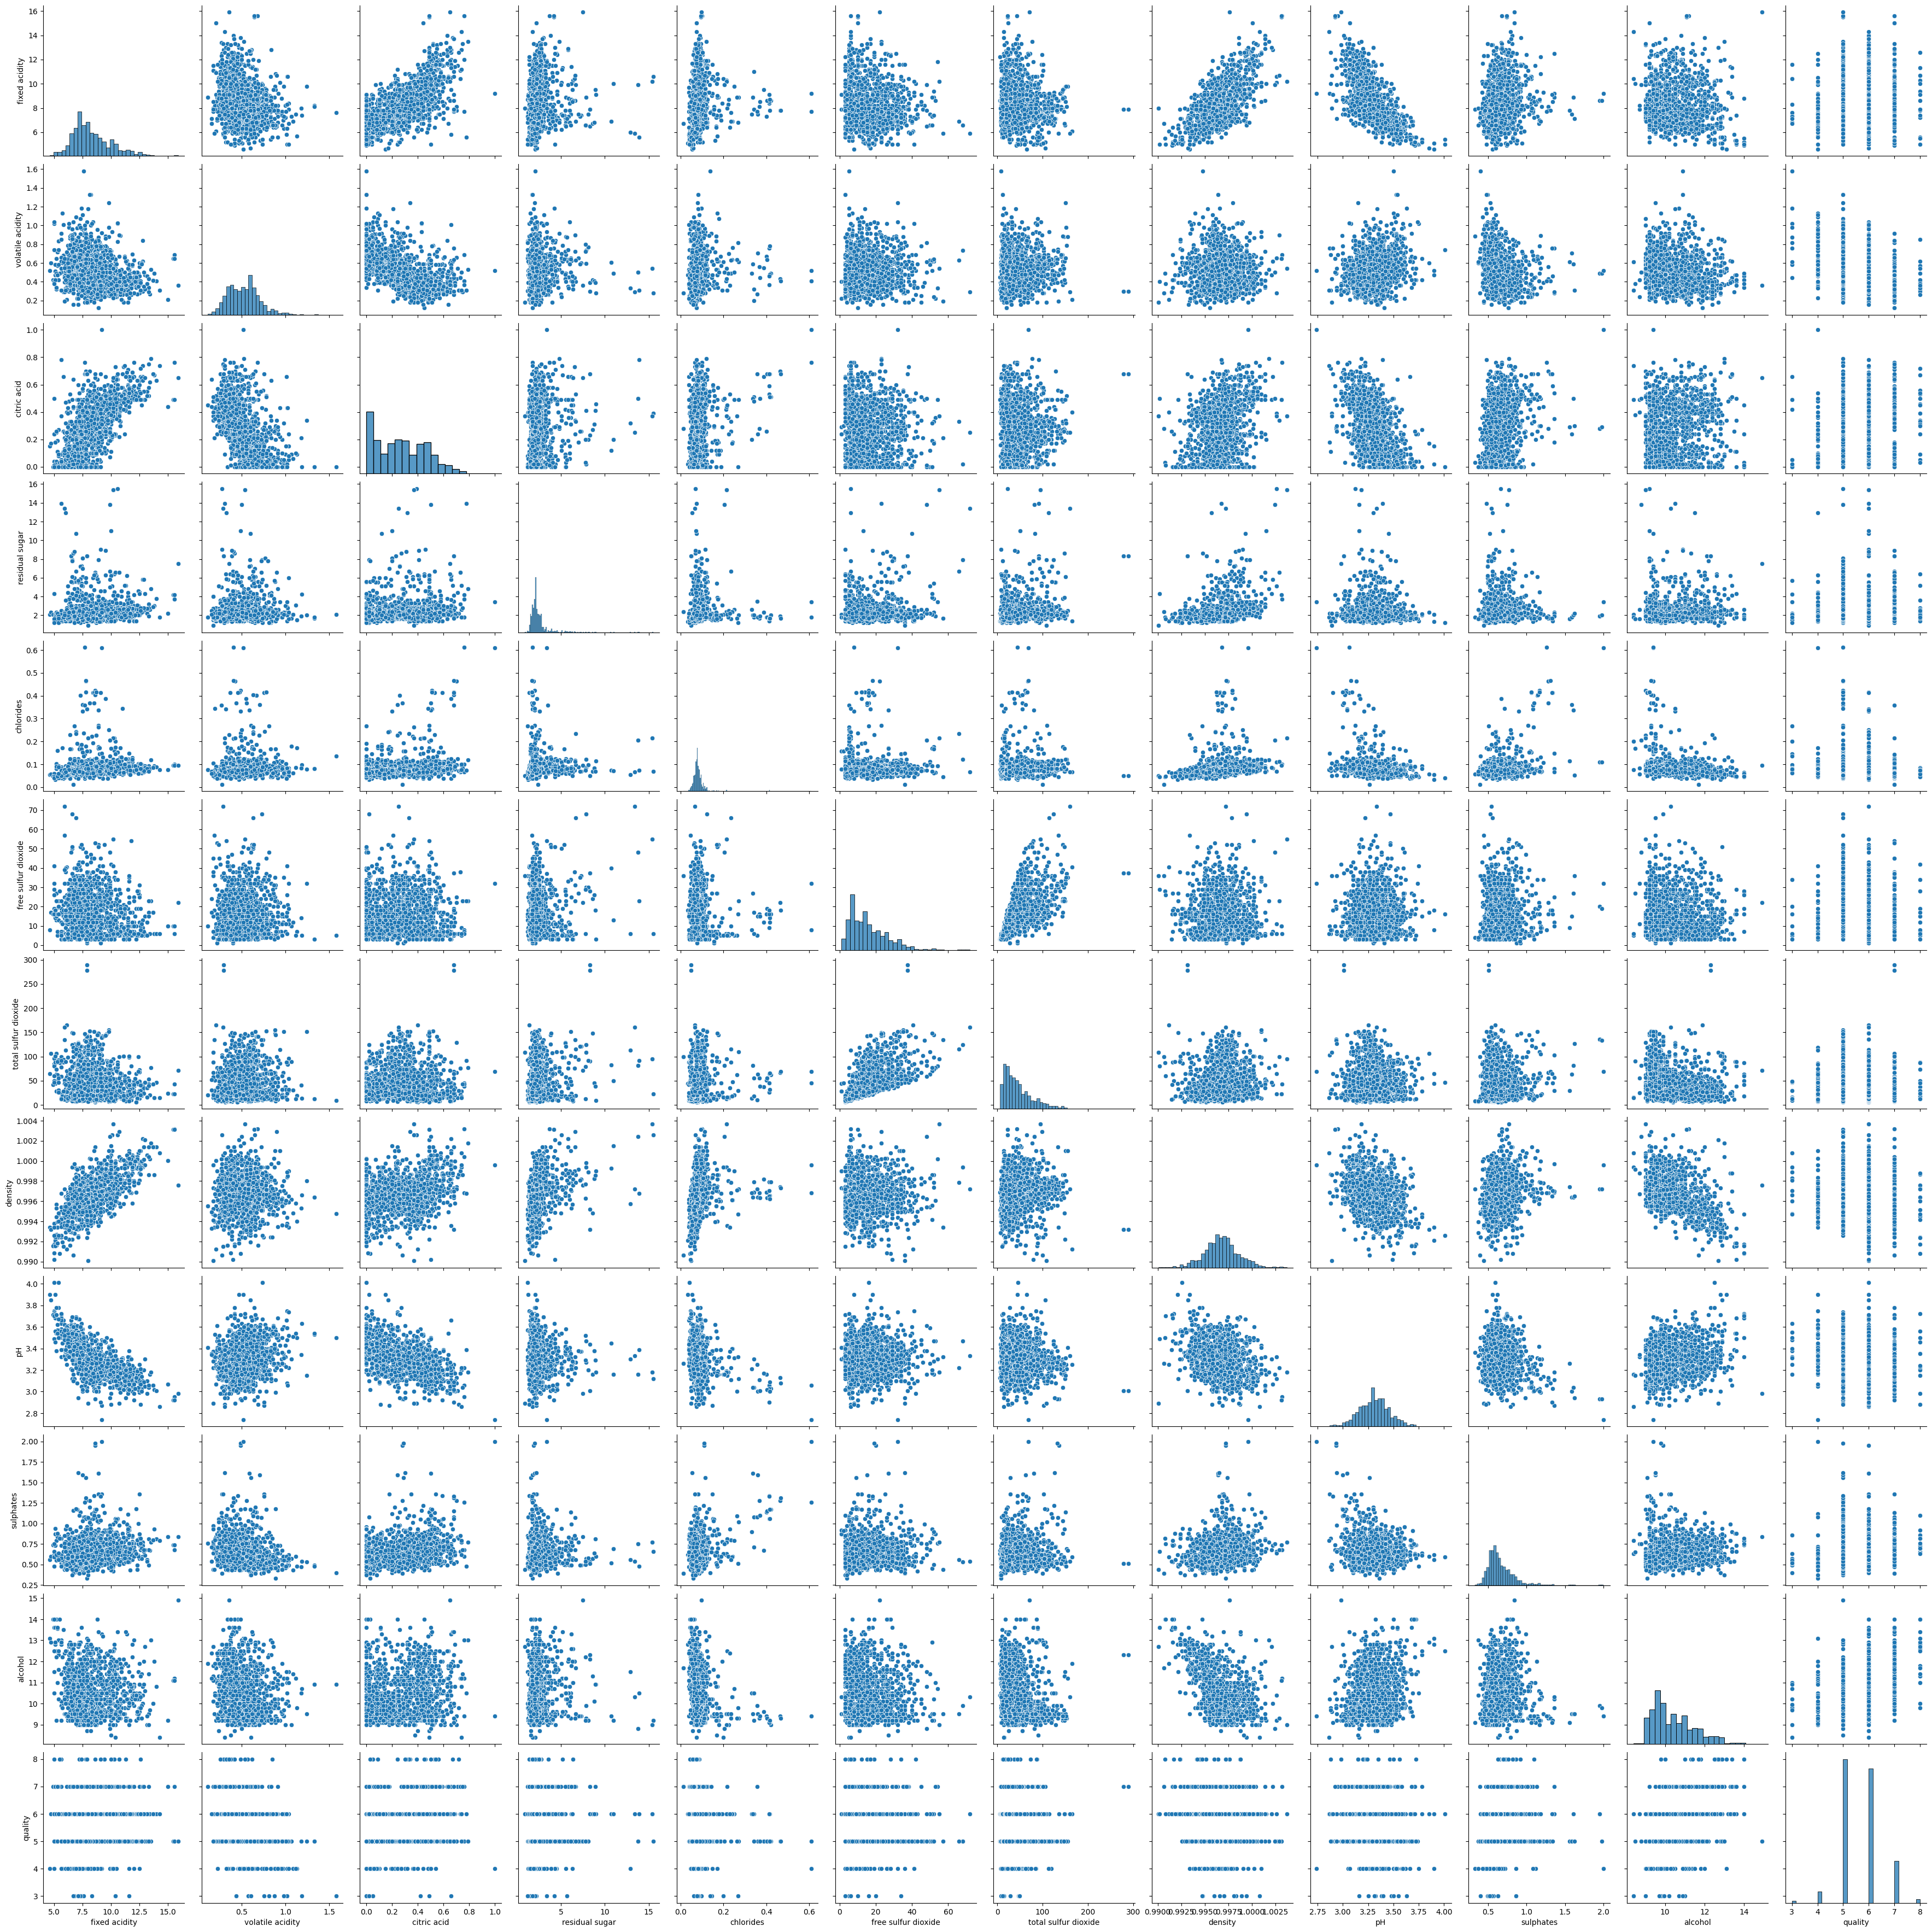

In [21]:
sns.pairplot(df_white, height=3.0)

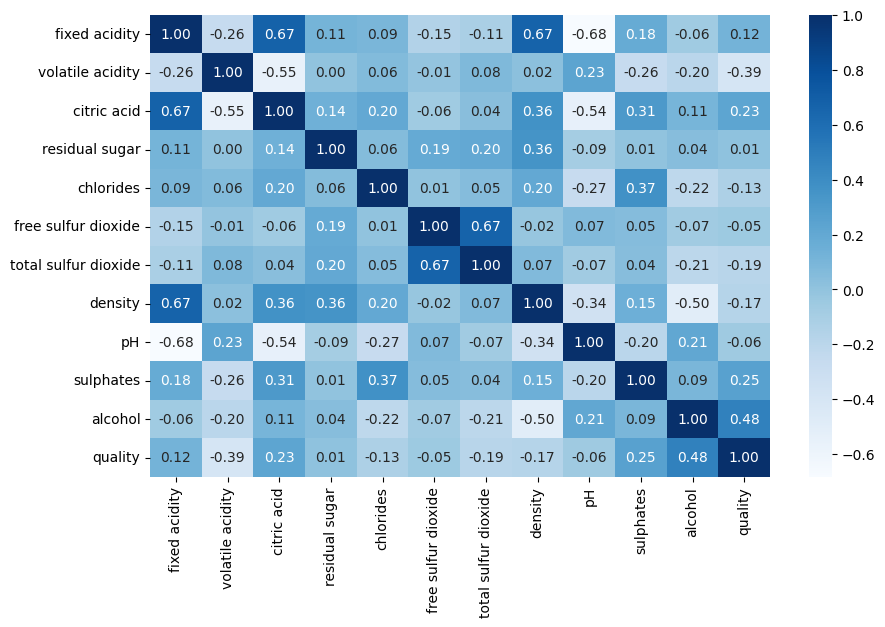

In [22]:

df=df_white.copy()
df.drop(['rating'], axis=1, inplace=True)
# Set the figure size 
plt.figure(figsize=(10, 6))

# Correlation matrix / heatmap
sns.heatmap(df.corr(),cmap='Blues', annot=True,fmt=".2f")
# Display the heatmap
plt.show()

In [23]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [24]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,cooking wine
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,cooking wine
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,trivial wine
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,cooking wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,cooking wine
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,trivial wine
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,trivial wine
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,cooking wine


In [25]:
#Divide dataset into features and targets and assign the features to a
#variable named 'X' and the target to a variable named 'y'
X = df_white.drop(columns=['quality','rating',])
y = df_white['rating']

In [26]:
# Encode the target labels to convert the categorical Genre 
#values into numerical form
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [27]:
y_encoded

array([0, 0, 0, ..., 2, 0, 2])

## PCA

In [28]:
#Use the StandardScaler() from sklearn to standardize data. 
# Then, apply the fit_transform() method 
#and store the standardized features in a variable called X_scaled.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
#Fit the transformed X_scaled data into the PCA() model
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

In [30]:
#Calculate the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

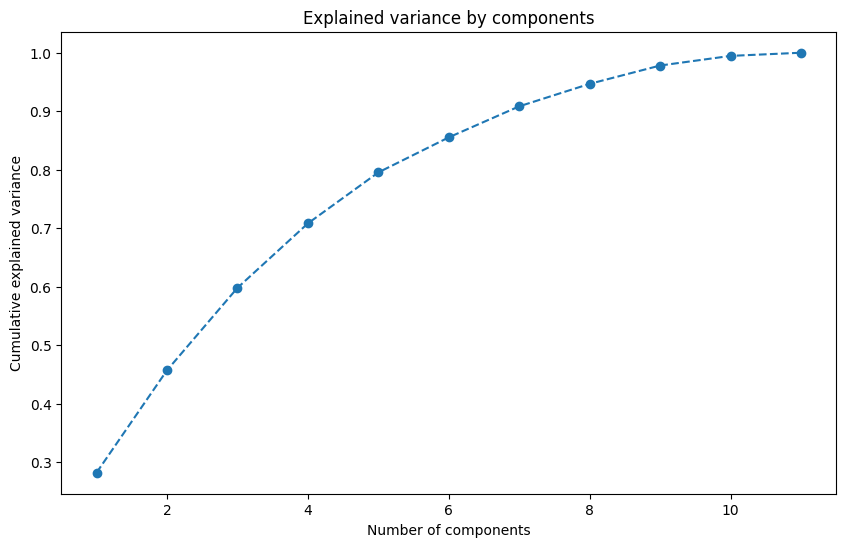

In [31]:
#Visualize the explained variance against the number of principal components 
plt.figure(figsize=(10,6))
plt.plot(range(1,12),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [32]:
# Perform PCA again by defining n_components = 9 
#and transform  scaled data with this PCA model.
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
X_pca


array([[-1.61952988,  0.45095009, -1.77445415, ..., -0.91392069,
        -0.16104319, -0.28225828],
       [-0.79916993,  1.85655306, -0.91169017, ...,  0.92971392,
        -1.00982858,  0.76258697],
       [-0.74847909,  0.88203886, -1.17139423, ...,  0.40147313,
        -0.53955348,  0.59794606],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.50640956,
        -0.23108221,  0.07938219],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.86040762,
        -0.32148695, -0.46887589],
       [-0.42697475, -0.53669021,  1.6289552 , ..., -0.49615364,
         1.18913227,  0.04217568]])

In [33]:
#Split the transformed data and the encoded target variable into 
#training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=1)


# testing models

In [34]:
#Applying Logistic Regression on PCA trnasformed data
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [35]:
#Accuracy score and classification report-PCA transformed dataset
y_pred = classifier.predict(X_test)
print("balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

balanced Accuracy: 0.5079816017316018

Classification Report:
               precision    recall  f1-score   support

cooking wine       0.69      0.81      0.74       154
   promising       0.28      0.22      0.25        32
trivial wine       0.58      0.50      0.54       134

    accuracy                           0.62       320
   macro avg       0.52      0.51      0.51       320
weighted avg       0.60      0.62      0.61       320



In [36]:
# Carry out same process with the Original dataset
#split data set
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=1)

In [37]:


logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [38]:
#Accuracy score and classification report -Original dataset
y_pred_orig = logreg_orig.predict(X_test_orig)
print(" Balanced Accuracy with Original Features:", balanced_accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

 Balanced Accuracy with Original Features: 0.5193674484719261

Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.70      0.79      0.74       154
   promising       0.32      0.25      0.28        32
trivial wine       0.57      0.52      0.54       134

    accuracy                           0.62       320
   macro avg       0.53      0.52      0.52       320
weighted avg       0.61      0.62      0.61       320



In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_orig, y_train_orig)

RandomForestClassifier()

In [40]:
y_test_pred = model.predict(X_test_orig)
print(balanced_accuracy_score(y_test_orig, y_test_pred))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_test_pred, target_names=le.classes_))

0.6677832428765265

Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.80      0.82      0.81       154
   promising       0.56      0.47      0.51        32
trivial wine       0.71      0.72      0.71       134

    accuracy                           0.74       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.74      0.74      0.74       320



In [41]:
importances = model.feature_importances_
feature_names = X.columns  
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

  
print(importances_df)

                 Feature  Importance
10               alcohol    0.158494
9              sulphates    0.124325
1       volatile acidity    0.099049
6   total sulfur dioxide    0.098810
7                density    0.092400
4              chlorides    0.076055
8                     pH    0.075088
0          fixed acidity    0.072088
2            citric acid    0.071005
3         residual sugar    0.068661
5    free sulfur dioxide    0.064026


In [42]:
importances_df['Feature'].to_list()

['alcohol',
 'sulphates',
 'volatile acidity',
 'total sulfur dioxide',
 'density',
 'chlorides',
 'pH',
 'fixed acidity',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide']

In [43]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(max_depth=depth)
    model.fit(X_train_orig, y_train_orig)
    y_test_pred = model.predict(X_test_orig)
    y_train_pred = model.predict(X_train_orig)

    models['train_score'].append(balanced_accuracy_score(y_train_orig, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_orig, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

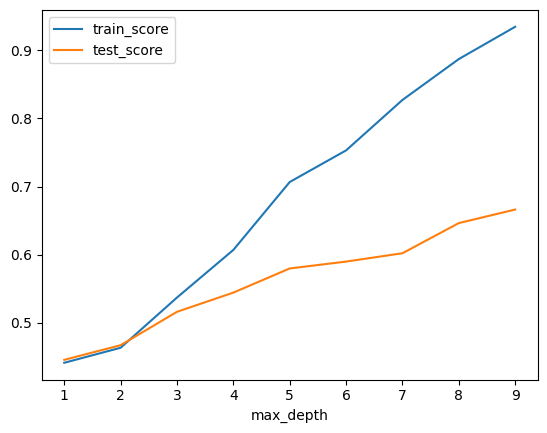

In [44]:
models_df.plot(x='max_depth')

In [45]:
model = RandomForestClassifier(max_depth=3)
model.fit(X_train_orig, y_train_orig)
y_test_pred = model.predict(X_test_orig)
y_train_pred=model.predict(X_train_orig)
print(balanced_accuracy_score(y_test_orig, y_test_pred))
print(balanced_accuracy_score(y_train_orig, y_train_pred))

0.5234925211604317
0.5332367476435272


In [46]:
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_test_pred, target_names=le.classes_))


Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.69      0.82      0.75       154
   promising       0.83      0.16      0.26        32
trivial wine       0.61      0.59      0.60       134

    accuracy                           0.66       320
   macro avg       0.71      0.52      0.54       320
weighted avg       0.67      0.66      0.64       320



In [47]:
treemodel=tree.DecisionTreeClassifier()
treemodel.fit(X_train_orig, y_train_orig)

DecisionTreeClassifier()

In [48]:
tree_pred=treemodel.predict(X_test_orig)

In [49]:
print(balanced_accuracy_score(y_test_orig, tree_pred))

0.6418334464043419


In [50]:
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, tree_pred, target_names=le.classes_))


Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.75      0.73      0.74       154
   promising       0.43      0.59      0.50        32
trivial wine       0.64      0.60      0.62       134

    accuracy                           0.66       320
   macro avg       0.61      0.64      0.62       320
weighted avg       0.67      0.66      0.67       320



In [51]:
from sklearn.svm import SVC 
svc=SVC(kernel='linear')
svc.fit(X_train_orig,y_train_orig)

SVC(kernel='linear')

In [52]:
svc_pred=svc.predict(X_test_orig)

In [53]:
print(balanced_accuracy_score(y_test_orig, svc_pred))

0.5339334173289397


In [54]:
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, svc_pred, target_names=le.classes_))


Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.69      0.81      0.75       154
   promising       0.34      0.31      0.33        32
trivial wine       0.58      0.48      0.52       134

    accuracy                           0.62       320
   macro avg       0.54      0.53      0.53       320
weighted avg       0.61      0.62      0.61       320



# ML optimization

In [55]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,RandomUnderSampler

In [56]:
samplers=[RandomOverSampler(random_state=1),SMOTE(random_state=1, sampling_strategy='auto'),SMOTEENN(random_state=1),ClusterCentroids(random_state=1),RandomUnderSampler(random_state=1)]
Scores=[]
for sampler in samplers:
    sample=sampler
    X_resampled, y_resampled = sample.fit_resample(X_train_orig, y_train_orig)
    cc_model = RandomForestClassifier()
    cc_model.fit(X_resampled, y_resampled)
    cc_y_pred = cc_model.predict(X_test_orig)
    print(f"Classification Report - {sampler}")
    print(classification_report(y_test_orig, cc_y_pred, target_names=le.classes_))
    Scores.append([
        accuracy_score(cc_y_pred,y_test_orig),
        sampler
    ])
print(f"Classification Report - Original Data")
print(classification_report(y_test_orig, y_test_pred, target_names=le.classes_))

Classification Report - RandomOverSampler(random_state=1)
              precision    recall  f1-score   support

cooking wine       0.82      0.85      0.84       154
   promising       0.47      0.59      0.53        32
trivial wine       0.76      0.69      0.72       134

    accuracy                           0.76       320
   macro avg       0.69      0.71      0.70       320
weighted avg       0.76      0.76      0.76       320

Classification Report - SMOTE(random_state=1)
              precision    recall  f1-score   support

cooking wine       0.81      0.82      0.82       154
   promising       0.48      0.66      0.55        32
trivial wine       0.74      0.66      0.70       134

    accuracy                           0.74       320
   macro avg       0.68      0.72      0.69       320
weighted avg       0.75      0.74      0.74       320

Classification Report - SMOTEENN(random_state=1)
              precision    recall  f1-score   support

cooking wine       0.74      0

In [57]:
#creating a way to automaticaly pick the best resampler
Scores

[[0.75625, RandomOverSampler(random_state=1)],
 [0.740625, SMOTE(random_state=1)],
 [0.534375, SMOTEENN(random_state=1)],
 [0.653125, ClusterCentroids(random_state=1)],
 [0.646875, RandomUnderSampler(random_state=1)]]

In [58]:
sorted_scores = sorted(Scores, reverse=True)

In [59]:
sorted_scores

[[0.75625, RandomOverSampler(random_state=1)],
 [0.740625, SMOTE(random_state=1)],
 [0.653125, ClusterCentroids(random_state=1)],
 [0.646875, RandomUnderSampler(random_state=1)],
 [0.534375, SMOTEENN(random_state=1)]]

In [60]:
best_resampler = sorted_scores[0][1]

In [61]:
print(best_resampler)

RandomOverSampler(random_state=1)


In [62]:
# resampling model chosen random oversampler
resampler=best_resampler
X_resampled, y_resampled = resampler.fit_resample(X_train_orig, y_train_orig)

In [63]:
# testing different depth for random forest
models2 = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models2['max_depth'].append(depth)
    model2 = RandomForestClassifier(max_depth=depth)
    model2.fit(X_resampled, y_resampled)
    y_test_pred = model2.predict(X_test_orig)
    y_train_pred = model2.predict(X_resampled)

    models2['train_score'].append(balanced_accuracy_score(y_resampled, y_train_pred))
    models2['test_score'].append(balanced_accuracy_score(y_test_orig, y_test_pred))

models2_df = pd.DataFrame(models2)

<Axes: xlabel='max_depth'>

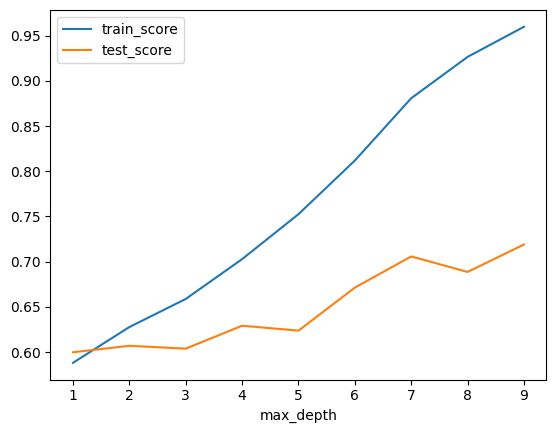

In [64]:
models2_df.plot(x='max_depth')

In [69]:
cc_model = RandomForestClassifier(max_depth=2)
cc_model.fit(X_resampled, y_resampled)
cc_y_pred = cc_model.predict(X_test_orig)
print(accuracy_score(y_test_orig, cc_y_pred))
print(classification_report(y_test_orig, cc_y_pred, target_names=le.classes_))

0.565625
              precision    recall  f1-score   support

cooking wine       0.68      0.86      0.76       154
   promising       0.28      0.78      0.42        32
trivial wine       0.62      0.18      0.28       134

    accuracy                           0.57       320
   macro avg       0.53      0.61      0.48       320
weighted avg       0.62      0.57      0.52       320



In [66]:
# using gridsearch for hyper parameter tuning
# setting up the param grid
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None, 1,2,3,4,5,6,7,8,9,10,20,30]
}
grid_search=GridSearchCV(estimator=cc_model,param_grid=param_grid, cv=5)
grid_search.fit(X_resampled,y_resampled)
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 100}

In [68]:
# retraining with new data
cc_model = RandomForestClassifier()
cc_model.set_params(**grid_search.best_params_)
cc_model.fit(X_resampled, y_resampled)
cc_y_pred = cc_model.predict(X_test_orig)
print(accuracy_score(y_test_orig, cc_y_pred))
print(classification_report(y_test_orig, cc_y_pred, target_names=le.classes_))

0.75625
              precision    recall  f1-score   support

cooking wine       0.82      0.84      0.83       154
   promising       0.52      0.53      0.52        32
trivial wine       0.74      0.71      0.73       134

    accuracy                           0.76       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.76      0.76      0.76       320

